In [5]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *
import os

(119, 110)
[[    0   119   238 ... 12733 12852 12971]
 [    1   120   239 ... 12734 12853 12972]
 [    2   121   240 ... 12735 12854 12973]
 ...
 [  116   235   354 ... 12849 12968 13087]
 [  117   236   355 ... 12850 12969 13088]
 [  118   237   356 ... 12851 12970 13089]]


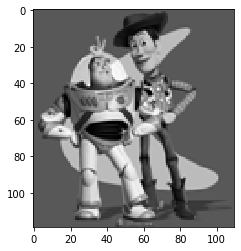

In [3]:
toy_img = cv2.cvtColor(cv2.imread('samples/toy_problem.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(toy_img, cmap = 'gray')
toy_img = toy_img.astype(np.float32)/255.0

print(toy_img.shape)
im_h, im_w = toy_img.shape
im2var = np.arange(im_h * im_w).reshape(im_w, im_h).T
print(im2var)

## Part 1 Toy Problem (20 pts)

In [7]:
from scipy.sparse import *
from scipy.sparse.linalg import lsqr

In [8]:
def toy_reconstruct(toy_img):
    """
    The implementation for gradient domain processing is not complicated, but it is easy to make a mistake, so let's start with a toy example. Reconstruct this image from its gradient values, plus one pixel intensity. Denote the intensity of the source image at (x, y) as s(x,y) and the value to solve for as v(x,y). For each pixel, then, we have two objectives:
    1. minimize ((v(x+1,y)-v(x,y)) - (s(x+1,y)-s(x,y)))^2
    2. minimize ((v(x,y+1)-v(x,y)) - (s(x,y+1)-s(x,y)))^2
    Note that these could be solved while adding any constant value to v, so we will add one more objective:
    3. minimize (v(1,1)-s(1,1))^2

    :param toy_img: numpy.ndarray
    """
    im_h, im_w = toy_img.shape
    im2var = np.arange(im_h * im_w).reshape(im_w, im_h).T
    # the size of A is (m+1)*n 
    # the size of v is n*1
    # the size of b is (m+1)*1
    m = (im_w-1)*im_h + (im_h-1)*im_w + 1
    n = im_w * im_h
    A = np.zeros((m,n), dtype = np.float32)
    b = np.zeros(m, dtype = np.float32)
    e = 0 # the number of equations 
    # objective 1: minimize ((v(x+1,y)-v(x,y)) - (s(x+1,y)-s(x,y)))^2 horizontal
    for x in range(0,im_w-1):
        for y in range(0,im_h):
            A[e][im2var[y][x+1]] = 1
            A[e][im2var[y][x]] = -1
            b[e] = toy_img[y][x+1] - toy_img[y][x]
            e = e + 1
    # objective 2: minimize ((v(x,y+1)-v(x,y)) - (s(x,y+1)-s(x,y)))^2 vertical
    for x in range(0,im_w):
        for y in range(0,im_h-1):
            A[e][im2var[y+1][x]] = 1
            A[e][im2var[y][x]] = -1
            b[e] = toy_img[y+1][x] - toy_img[y][x]
            e = e + 1
    # objective 3: minimize (v(1,1)-s(1,1))^2
    A[e][im2var[0][0]] = 1
    b[e] = toy_img[0][0]

    A_sparse = csr_matrix(lil_matrix(A))

    v = lsqr(A_sparse, b)[0].reshape(im_w, im_h).T

    return np.abs(v)

In [9]:
im_out = toy_reconstruct(toy_img)
if im_out.any():
    print("Error is: ", np.sqrt(((im_out - toy_img)**2).sum()))

Error is:  0.00032401502499604536


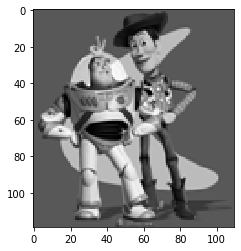

In [10]:
plt.imshow(im_out, cmap = 'gray')

## Preparation

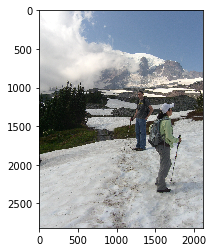

In [6]:
# Feel free to change image
background_img = cv2.cvtColor(cv2.imread('samples/im2.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)

If it doesn't get you to the drawing mode, then rerun this function again.


<IPython.core.display.Javascript object>


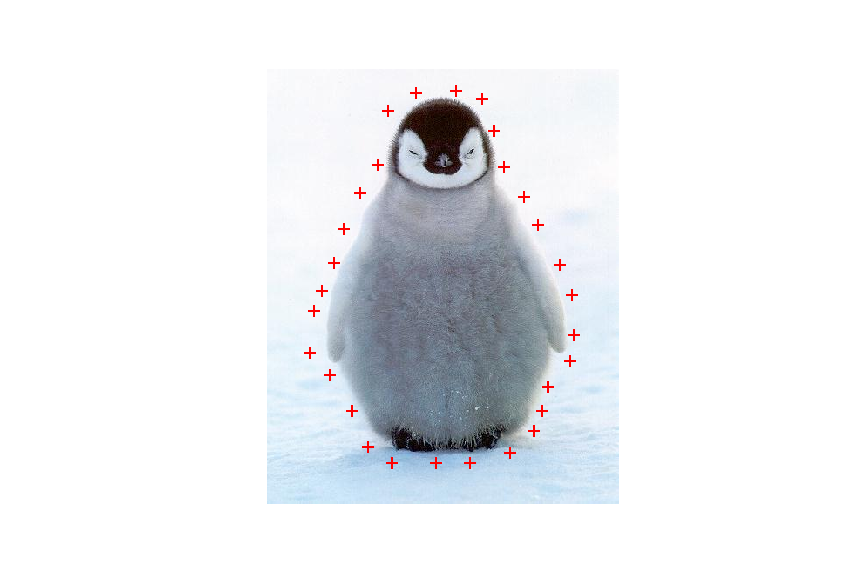

In [9]:
# Feel free to change image
object_img = cv2.cvtColor(cv2.imread('samples/penguin-chick.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
import matplotlib.pyplot as plt
%matplotlib notebook
mask_coords = specify_mask(object_img)

<Figure size 432x288 with 0 Axes>

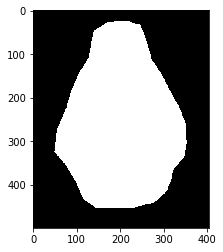

In [10]:
xs = mask_coords[0]
ys = mask_coords[1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
mask = get_mask(ys, xs, object_img)

If it doesn't get you to the drawing mode, then rerun this function again. Also, make sure the object fill fit into the background image. Otherwise it will crash


<IPython.core.display.Javascript object>


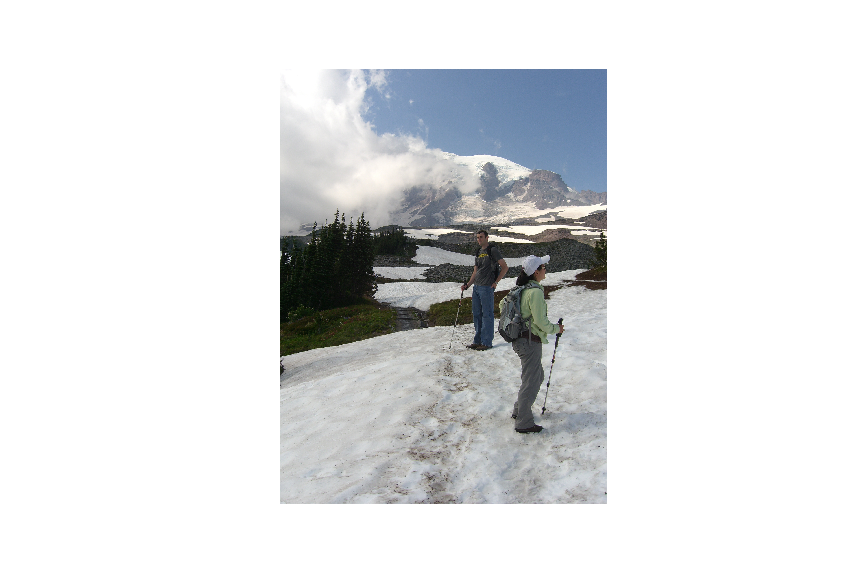

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
bottom_center = specify_bottom_center(background_img)

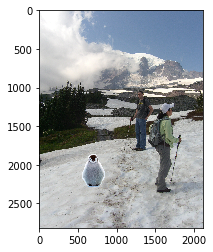

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
cropped_object, object_mask = align_source(object_img, mask, background_img, bottom_center)

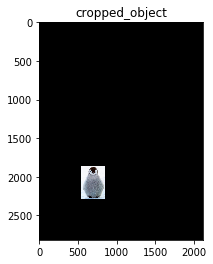

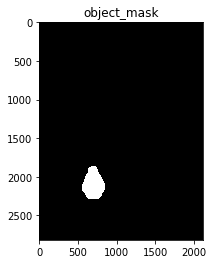

In [13]:
plt.imshow(cropped_object)
plt.title('cropped_object')
plt.show()
plt.imshow(object_mask, cmap = 'gray')
plt.title('object_mask')
plt.show()

## Part 2 Poisson Blending (50 pts)

In [14]:
import scipy
from scipy.sparse import *
from scipy.sparse.linalg import lsqr
def poisson_blend(cropped_object, object_mask, background_img):
    """
    :param cropped_object: numpy.ndarray One you get from align_source
    :param object_mask: numpy.ndarray One you get from align_source
    :param background_img: numpy.ndarray 
    """
    #TO DO 
    # select four boundary points and minimize (v(x,y)-s(x,y))^2 
    import pdb
    col, row = np.where(object_mask==True)
    min_col_arr = np.where(col==np.min(col))[0]
    min_col_sample = min_col_arr[0]
    max_col_arr = np.where(col==np.max(col))[0]
    max_col_sample = max_col_arr[0]
    min_row_arr = np.where(row==np.min(row))[0]
    min_row_sample = min_row_arr[0]
    max_row_arr = np.where(row==np.max(row))[0]
    max_row_sample = max_row_arr[0]
    
    # for the pixels in the mask region, do toy_reconstruct
    v = background_img[col[min_col_sample]:col[max_col_sample]+1,row[min_row_sample]:row[max_row_sample]+1,:]*0
    out = cropped_object[:,:,:]
    for i in range(background_img.shape[2]):
        im = cropped_object[col[min_col_sample] : col[max_col_sample]+1, row[min_row_sample] : row[max_row_sample] + 1, i]
        S = background_img[col[min_col_sample]:col[max_col_sample]+1,row[min_row_sample]:row[max_row_sample]+1,i]
        im_h, im_w = im.shape
        im2var = np.arange(im_h*im_w).reshape(im_w, im_h).T
        count = 0
        A = np.zeros((im_h*(im_w-1) + (im_h-1)*im_w + 4, im_h*im_w))
        b = np.zeros(A.shape[0])
        e = 0
        for y in range(im_h):
            for x in range(im_w-1):
                A[e][im2var[y][x+1]] = 1
                A[e][im2var[y][x]] = -1
                b[e] = im[y][x+1] - im[y][x] 
                e += 1
        for y in range(im_h-1):
            for x in range(im_w):
                A[e][im2var[y+1][x]] = 1
                A[e][im2var[y][x]] = -1
                b[e] = im[y+1][x] - im[y][x] 
                e += 1
        A[e][im2var[0][row[min_col_sample]-row[min_row_sample]]] = 1 
        b[e] = S[0][row[min_col_sample]-row[min_row_sample]] 
        e+=1
        A[e][im2var[-1][row[max_col_sample]-row[min_row_sample]]] = 1 
        b[e] = S[-1][row[max_col_sample]-row[min_row_sample]] 
        e+=1
        A[e][im2var[col[min_row_sample]-col[min_col_sample]][0]] = 1 
        b[e] = S[col[min_row_sample]-col[min_col_sample]][0] 
        e+=1
        A[e][im2var[col[max_row_sample]-col[min_col_sample]][-1]] = 1 
        b[e] = S[col[max_row_sample]-col[min_col_sample]][-1] 
        e+=1
        A_sparse = csr_matrix(lil_matrix(A))
        v[:,:,i] = lsqr(A_sparse, b)[0].reshape(im_w, im_h).T
    out[col[min_col_sample]:col[max_col_sample]+1,row[min_row_sample]:row[max_row_sample]+1,:] = v
    return  np.abs(out*np.stack((object_mask, object_mask, object_mask),axis=2)+background_img*(1-np.stack((object_mask, object_mask, object_mask),axis=2)))

In [ ]:
im_blend = poisson_blend(cropped_object, object_mask, background_img)

In [ ]:
plt.imshow(im_blend)

## Part 3 Mixed Gradients (20 pts)

In [ ]:
def mix_blend(cropped_object, object_mask, background_img):
    """
    :param cropped_object: numpy.ndarray One you get from align_source
    :param object_mask: numpy.ndarray One you get from align_source
    :param background_img: numpy.ndarray 
    """
    #TO DO 
    col, row = np.where(object_mask==True)
    min_col_arr = np.where(col==np.min(col))[0]
    min_col_sample = min_col_arr[0]
    max_col_arr = np.where(col==np.max(col))[0]
    max_col_sample = max_col_arr[0]
    min_row_arr = np.where(row==np.min(row))[0]
    min_row_sample = min_row_arr[0]
    max_row_arr = np.where(row==np.max(row))[0]
    max_row_sample = max_row_arr[0]
    
    # for the pixels in the mask region, do toy_reconstruct
    v = background_img[col[min_col_sample]:col[max_col_sample]+1,row[min_row_sample]:row[max_row_sample]+1,:]*0
    out = cropped_object[:,:,:]
    for i in range(background_img.shape[2]):
        im = cropped_object[col[min_col_sample] : col[max_col_sample]+1, row[min_row_sample] : row[max_row_sample] + 1, i]
        S = background_img[col[min_col_sample]:col[max_col_sample]+1,row[min_row_sample]:row[max_row_sample]+1,i]
        im_h, im_w = im.shape
        im2var = np.arange(im_h*im_w).reshape(im_w, im_h).T
        count = 0
        A = np.zeros((im_h*(im_w-1) + (im_h-1)*im_w + 4, im_h*im_w))
        b = np.zeros(A.shape[0])
        e = 0
        for y in range(im_h):
            for x in range(im_w-1):
                A[e][im2var[y][x+1]] = 1
                A[e][im2var[y][x]] = -1
                b[e] = compare(im[y][x+1] - im[y][x], S[y][x+1] - S[y][x])
                e += 1
        for y in range(im_h-1):
            for x in range(im_w):
                A[e][im2var[y+1][x]] = 1
                A[e][im2var[y][x]] = -1
                b[e] = compare(im[y+1][x] - im[y][x], S[y+1][x] - S[y][x])
                e += 1
        A[e][im2var[0][row[min_col_sample]-row[min_row_sample]]] = 1 
        b[e] = S[0][row[min_col_sample]-row[min_row_sample]] 
        e+=1
        A[e][im2var[-1][row[max_col_sample]-row[min_row_sample]]] = 1 
        b[e] = S[-1][row[max_col_sample]-row[min_row_sample]] 
        e+=1
        A[e][im2var[col[min_row_sample]-col[min_col_sample]][0]] = 1 
        b[e] = S[col[min_row_sample]-col[min_col_sample]][0] 
        e+=1
        A[e][im2var[col[max_row_sample]-col[min_col_sample]][-1]] = 1 
        b[e] = S[col[max_row_sample]-col[min_col_sample]][-1] 
        e+=1
        A_sparse = csr_matrix(lil_matrix(A))
        v[:,:,i] = scipy.sparse.linalg.lsqr(A_sparse, b)[0].reshape(im_w, im_h).T
    out[col[min_col_sample]:col[max_col_sample]+1,row[min_row_sample]:row[max_row_sample]+1,:] = v
    return  np.abs(out*np.stack((object_mask, object_mask, object_mask),axis=2)+background_img*(1-np.stack((object_mask, object_mask, object_mask),axis=2)))
    pass

def compare(a, b):
    if abs(a) > abs(b):
        return a
    else:
        return b

In [ ]:
im_mix = mix_blend(cropped_object, object_mask, background_img)
if im_mix.any():
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.imshow(im_mix)

# Bells & Whistles (Extra Points)

## Color2Gray (20 pts)

In [ ]:
def color2gray(img):
    pass

## Laplacian pyramid blending (20 pts)

In [ ]:
def laplacian_blend(img1, img2):
    pass

## More gradient domain processing (up to 20 pts)